<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
#Into Pandas DataFrame
raw_df = pd.read_csv(breast_cancer_csv)
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# change index to ID instead
raw_df.set_index('id', inplace=True)

In [5]:
# check to see if the index change is implemented
raw_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# dtypes of the columns
raw_df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [7]:
raw_df.shape

(569, 32)

In [8]:
# Describe Data
raw_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# checking for the NaN values
raw_df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [10]:
# drop column unnamed: 32 as all of it is missing values
raw_df = raw_df.drop(columns = 'Unnamed: 32')

# check df
raw_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0, 0.5, 'Frequency')

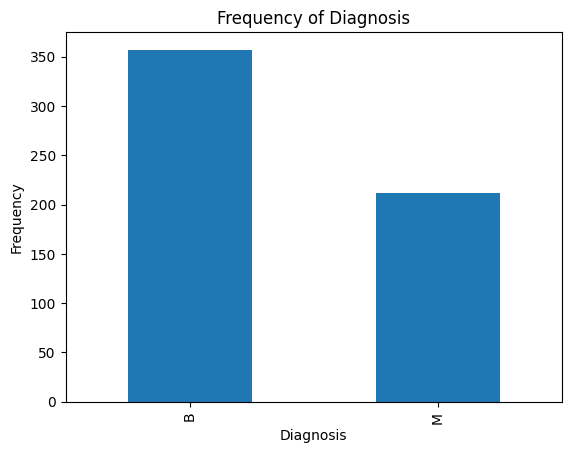

In [11]:
# frequency plot of dianosis

# plotting graph
plt.plot(figsize = (15, 10))
raw_df['diagnosis'].value_counts().sort_index().plot.bar(title = 'Frequency of Diagnosis')

# labelling the graph
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')

In [12]:
# change diagnosis to binary
df = raw_df.pipe(lambda x: pd.get_dummies(x))
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


<AxesSubplot: >

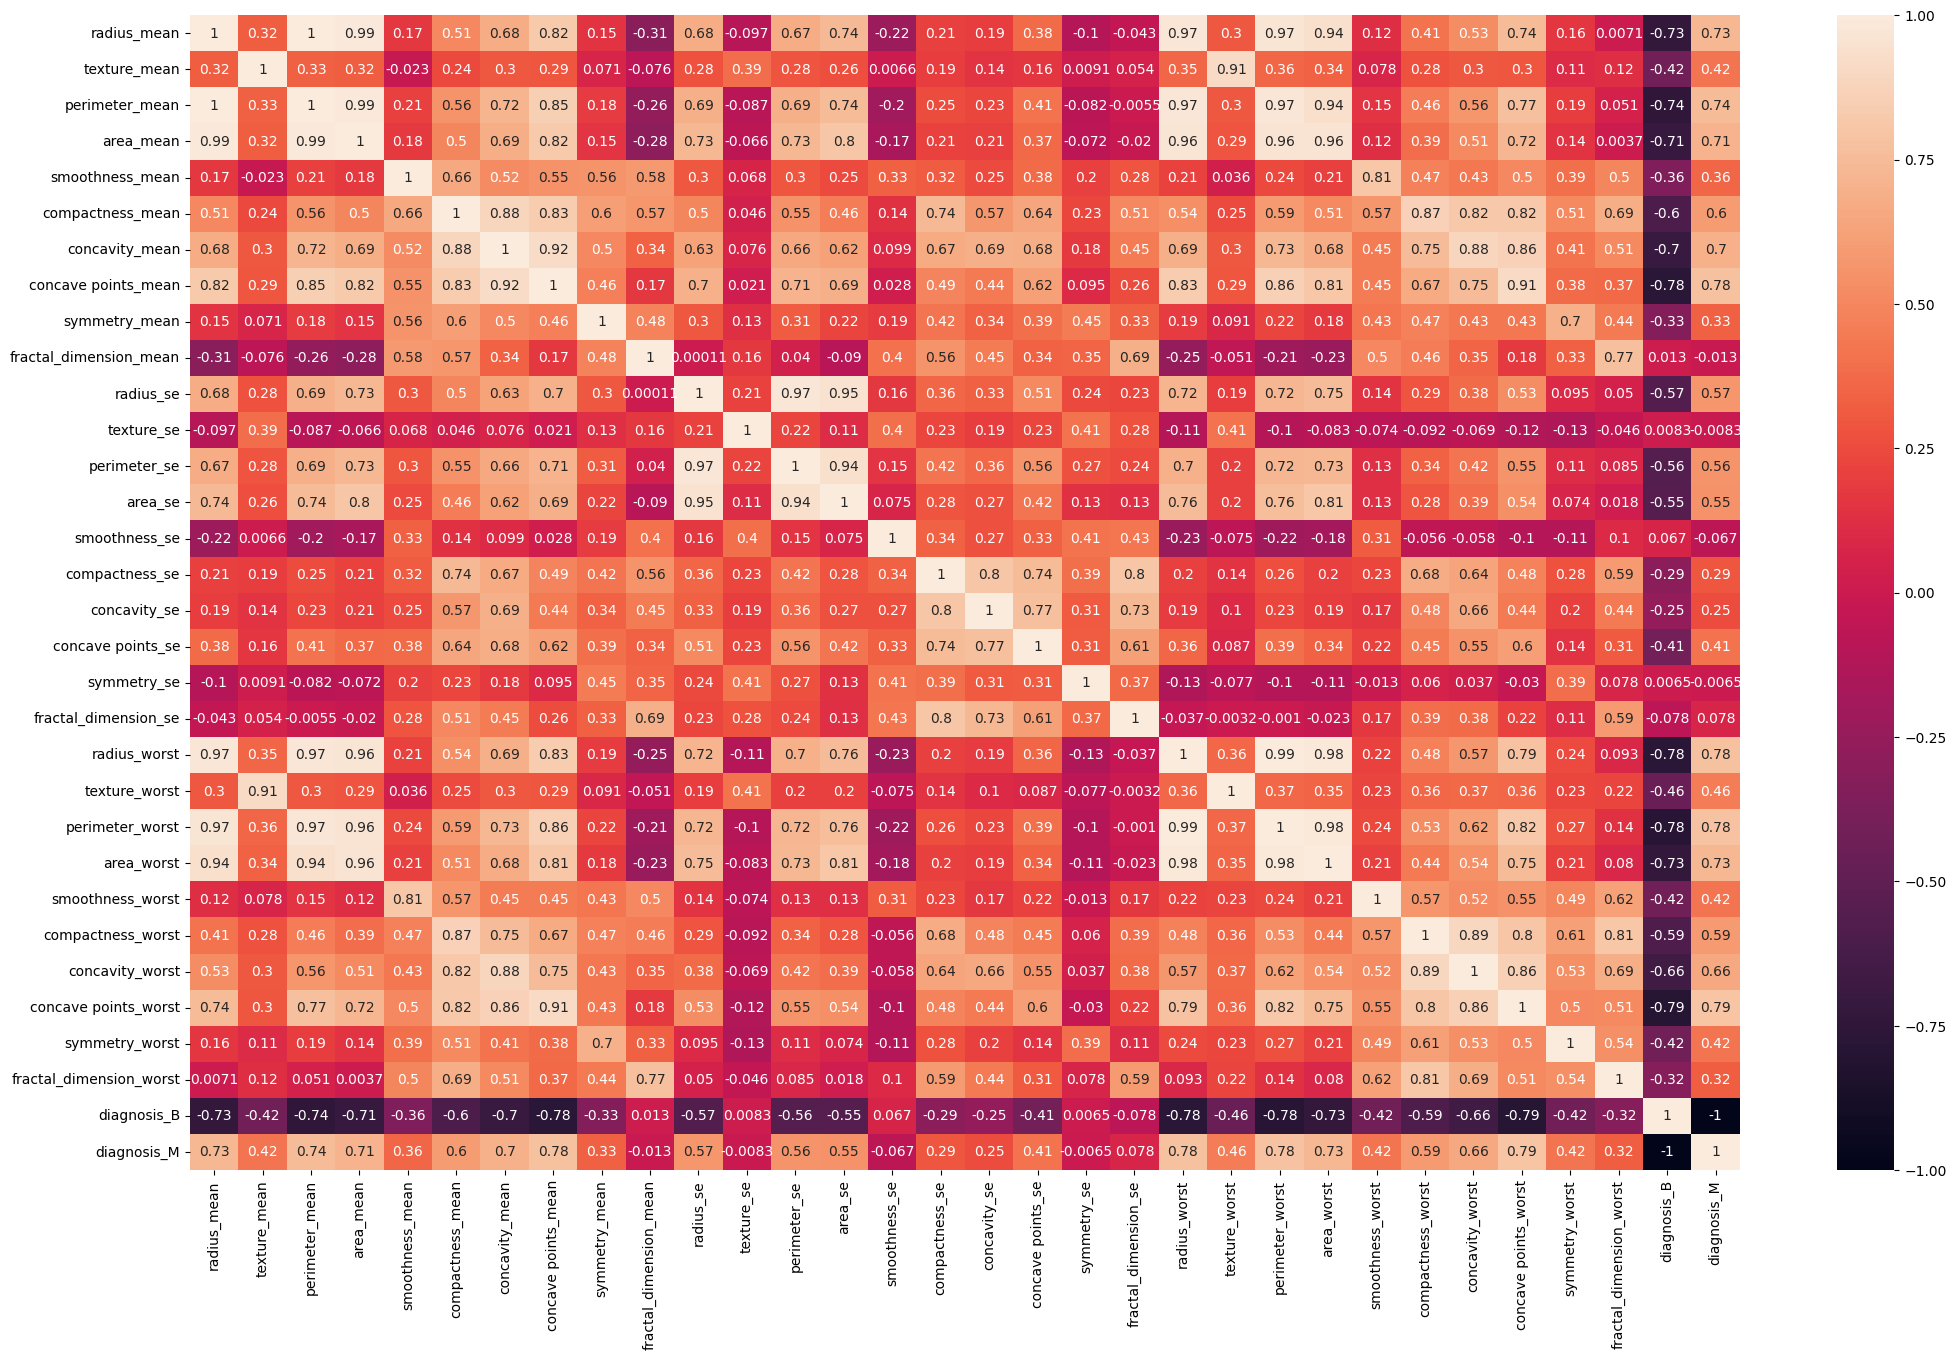

In [13]:
# plot correlation heat map of the variables
fig, ax = plt.subplots(figsize=(25,15)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [14]:
# correlation of just the Malignant diagnosises
df.corr()['diagnosis_M']

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

In [15]:
# leaving only diagnosis_m (dropping b)
data = df.drop(columns = 'diagnosis_B')
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [16]:
# making the "worst" columns as predictor columns
predictor_columns = [c for c in data.columns if (c != 'diagnosis_M') & ('worst' in c)]

# checking the columns
predictor_columns

['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [17]:
# define the target variable (dependent variable) as y
y = data['diagnosis_M']

# Load the dataset as a pandas data frame
X = pd.DataFrame(data, columns = predictor_columns)
X.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,
842302,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
X.shape

(569, 10)

In [20]:
# train, split, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# check shapes
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

#check the mean of test and train
print(f"Train Probablity of M Diagnosis: {y_train.mean()}")
print(f"Test Probablity of M Diagnosis: {y_test.mean()}")
# I tried test_size=0.1 at first but the means had some differences so I am using 0.2 for size instead

X_train: (455, 10)
y_train: (455,)
X_test: (114, 10)
y_test: (114,)
Train Probablity of M Diagnosis: 0.37362637362637363
Test Probablity of M Diagnosis: 0.3684210526315789


In [21]:
# Build Logistic Regression Model
reg_model = LogisticRegression(random_state=1, max_iter=2000)

# Fit Model
reg_model.fit(X_train, y_train)

# predict train model
reg_probs = reg_model.predict_proba(X_train)[:,1]
# if near to 1 = M, if near to 0 = B
reg_pred = np.array([0 if x < 0.5 else 1 for x in reg_probs])

# printing the accuracy score, confusion matrix and classification report for that model.
print(f"Accuracy: {metrics.accuracy_score(y_train, reg_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, reg_pred)}\nClassification Report: {metrics.classification_report(y_train, reg_pred)}")

Accuracy: 0.96
Confusion Matrix: [[276   9]
 [ 10 160]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       285
           1       0.95      0.94      0.94       170

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



In [22]:
# predict test model
reg_probs = reg_model.predict_proba(X_test)[:,1]
# if near to 1 = M, if near to 0 = B
reg_pred = np.array([0 if x < 0.5 else 1 for x in reg_probs])

# printing the accuracy score, confusion matrix and classification report for that model.
print(f"Accuracy: {metrics.accuracy_score(y_test, reg_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, reg_pred)}\nClassification Report: {metrics.classification_report(y_test, reg_pred)}")

Accuracy: 0.93
Confusion Matrix: [[71  1]
 [ 7 35]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [23]:
# same target variable (dependent variable) as y
# same predictor variables

In [24]:
# Build SVM Model
SVM_model = svm.SVC(kernel = 'linear')

# Fit Model
SVM_model.fit(X_train, y_train)

# predict training model
SVM_pred = SVM_model.predict(X_train)

# printing the accuracy score, confusion matrix and classification report for that model.
print(f"Accuracy: {metrics.accuracy_score(y_train, SVM_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, SVM_pred)}\nClassification Report: {metrics.classification_report(y_train, SVM_pred)}")

Accuracy: 0.96
Confusion Matrix: [[277   8]
 [  9 161]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97       285
           1       0.95      0.95      0.95       170

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



In [25]:
# predict test model
SVM_pred = SVM_model.predict(X_test)

# printing the accuracy score, confusion matrix and classification report for that model.
print(f"Accuracy: {metrics.accuracy_score(y_test, SVM_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, SVM_pred)}\nClassification Report: {metrics.classification_report(y_test, SVM_pred)}")

Accuracy: 0.94
Confusion Matrix: [[70  2]
 [ 5 37]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [26]:
# still the same target and predictors for now
# target (x) = diagnosis_M, predictors (y) = columns with worst

In [27]:
# Build Naive Bayes Model
Naive_model = GaussianNB()

# Fit Model
Naive_model.fit(X_train, y_train)

# predict training model
Naive_pred = Naive_model.predict(X_train)

# printing the accuracy score, confusion matrix and classification report for that model.
print(f"Accuracy: {metrics.accuracy_score(y_train, Naive_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_train, Naive_pred)}\nClassification Report: {metrics.classification_report(y_train, Naive_pred)}")

Accuracy: 0.95
Confusion Matrix: [[274  11]
 [ 11 159]]
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       285
           1       0.94      0.94      0.94       170

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



In [28]:
# predict test model
Naive_pred = Naive_model.predict(X_test)

# printing the accuracy score, confusion matrix and classification report for that model.
print(f"Accuracy: {metrics.accuracy_score(y_test, Naive_pred):.2f}\nConfusion Matrix: {metrics.confusion_matrix(y_test, Naive_pred)}\nClassification Report: {metrics.classification_report(y_test, Naive_pred)}")

Accuracy: 0.94
Confusion Matrix: [[70  2]
 [ 5 37]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [29]:
# using 2 different params as penalty l1 needs a solver
lr_params_1 = {
    'penalty': ['l1'],
    'solver': ['liblinear'],
    'C': [1, 10, 100]
}

In [30]:
# param with l2
lr_params_2 = {
    'penalty': ['l2'],
    'C': [1, 10, 100]
}

In [31]:
from sklearn.model_selection import GridSearchCV

##### Params: l1

In [32]:
# setting base Logistic regression estimator model
base_estimator = LogisticRegression(max_iter=2000, random_state=0)

# using grid search cv
gs_lr = GridSearchCV(base_estimator,
                     param_grid=lr_params_1,
                     scoring='accuracy',
                     cv = 10)

# fitting model with training set
gs_lr.fit(X_train, y_train)

# getting the best params
gs_lr.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [33]:
# getting the train set score using best params
gs_lr.score(X_train, y_train)

0.9868131868131869

In [34]:
# getting the test set score using best params
gs_lr.score(X_test, y_test)

0.9649122807017544

##### Params: l2

In [35]:
# setting base Logistic regression estimator model
base_estimator = LogisticRegression(max_iter=2000, random_state=0)

# using grid search cv
gs_lr = GridSearchCV(base_estimator,
                     param_grid=lr_params_2,
                     scoring='accuracy',
                     cv = 10)

# fitting model with training set
gs_lr.fit(X_train, y_train)

# getting the best params
gs_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [36]:
# getting the train set score using best params
gs_lr.score(X_train, y_train)

0.9802197802197802

In [37]:
# getting the test set score using best params
gs_lr.score(X_test, y_test)

0.956140350877193

#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [38]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [39]:
# setting base Logistic regression estimator model
base_estimator = svm.SVC(random_state=0)

# using grid search cv
svc_lr = GridSearchCV(base_estimator,
                     param_grid=svc_params,
                     scoring='accuracy',
                     cv = 10)

# fitting model with training set
svc_lr.fit(X_train, y_train)

# getting the best params
svc_lr.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

In [40]:
# getting the train set score using best params
gs_lr.score(X_train, y_train)

0.9802197802197802

In [41]:
# getting the test set score using best params
gs_lr.score(X_test, y_test)

0.956140350877193

#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [42]:
# Build Best Logistic Regression Model
reg_model = LogisticRegression(penalty='l1', solver = 'liblinear', C=100, random_state=1, max_iter=2000)

# Fit Model
reg_model.fit(X_train, y_train)

# Get the predicted probability vector
reg_pred = pd.DataFrame(reg_model.predict_proba(X_test), columns= ['class_0_pp','class_1_pp'])

In [43]:
# For Logistic Regression, find the area under the curve
# Find fpr, tpr
reg_fpr, reg_tpr, reg_ = metrics.roc_curve(y_test, reg_pred['class_1_pp'])

# Find auc
reg_auc = metrics.auc(reg_fpr, reg_tpr)

In [44]:
# Build Best SVM Model
SVM_model = svm.SVC(kernel = 'linear', gamma = 0.001, C = 100)

#probability = True
SVM_model.probability=True

# Fit Model
SVM_model.fit(X_train, y_train)

# Get the predicted probability vector
SVM_pred = pd.DataFrame(SVM_model.predict_proba(X_test), columns= ['class_0_pp','class_1_pp'])

In [45]:
# For SVM model, find the area under the curve
# Find fpr, tpr
SVM_fpr, SVM_tpr, SVM_ = metrics.roc_curve(y_test, SVM_pred['class_1_pp'])

# Find auc
SVM_auc = metrics.auc(SVM_fpr, SVM_tpr)

In [46]:
# Build Naive Bayes Model
NB_model = GaussianNB()

# Fit Model
NB_model.fit(X_train, y_train)

# Get the predicted probability vector
NB_pred = pd.DataFrame(NB_model.predict_proba(X_test), columns= ['class_0_pp','class_1_pp'])

In [47]:
# For Naive Bayes, find the area under the curve
# Find fpr, tpr
NB_fpr, NB_tpr, NB_ = metrics.roc_curve(y_test, NB_pred['class_1_pp'])

# Find auc
NB_auc = metrics.auc(NB_fpr, NB_tpr)

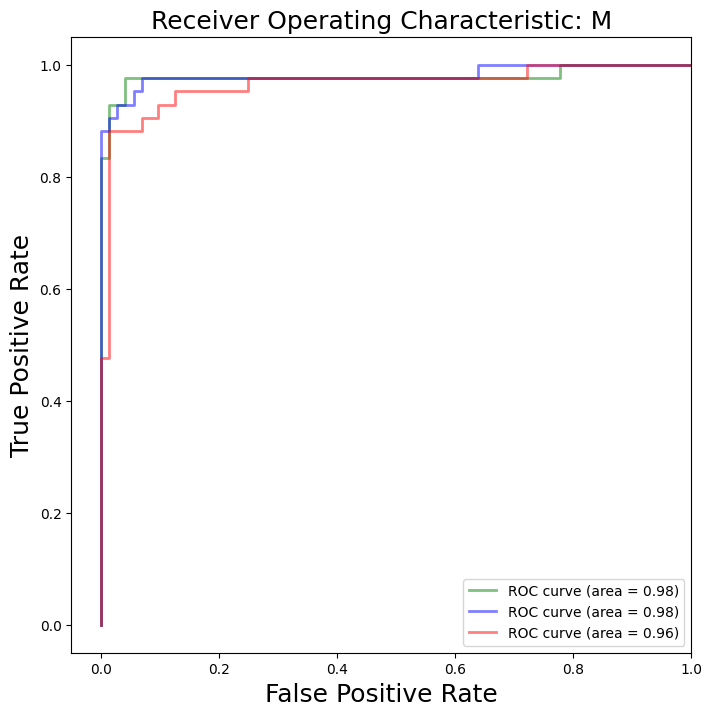

In [48]:
#Figure
plt.figure(figsize=[8,8])

# Plot logistic Regression fpr, tpr
plt.plot(reg_fpr, reg_tpr, color='green', lw = 2, label = 'ROC curve (area = %0.2f)' % reg_auc, alpha = 0.5)

# Plot SVM fpr, tpr
plt.plot(SVM_fpr, SVM_tpr, color='blue', lw = 2, label = 'ROC curve (area = %0.2f)' % SVM_auc, alpha = 0.5)

# Plot Naive Bayes fpr, tpr
plt.plot(NB_fpr, NB_tpr, color='red', lw = 2, label = 'ROC curve (area = %0.2f)' % NB_auc, alpha = 0.5)

#labels
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [166]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

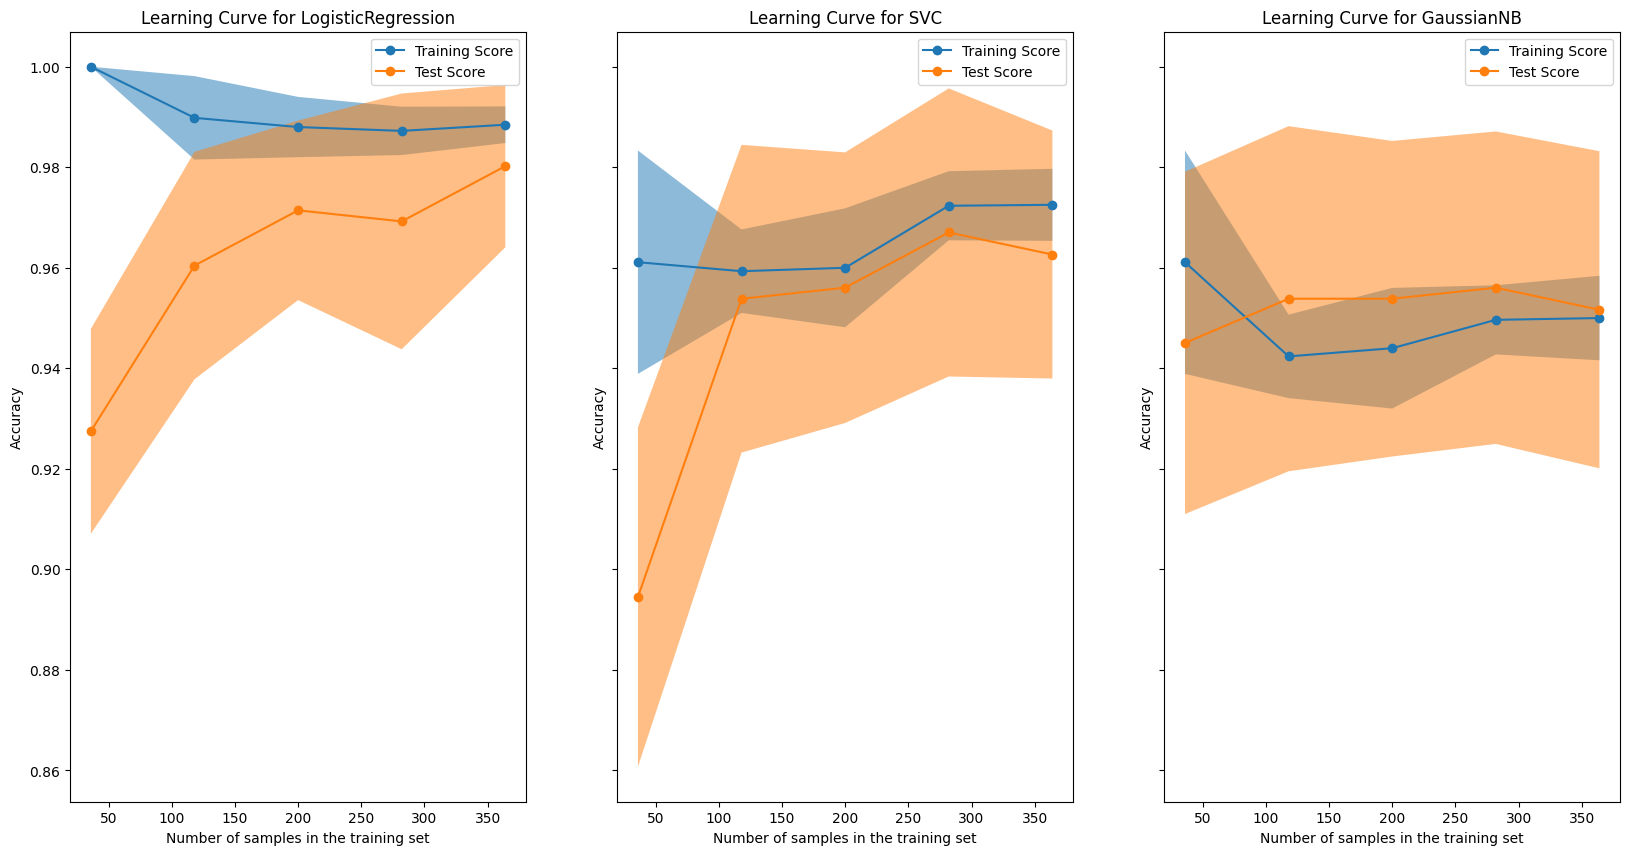

In [49]:
from sklearn.model_selection import LearningCurveDisplay

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([reg_model, SVM_model, NB_model]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



